In [1]:
import numpy as np
import torch

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
# provider = IBMQ.load_account()

In [2]:
from qiskit import Aer, QuantumCircuit
from qiskit.circuit import Parameter, ParameterVector
from qiskit.circuit.library import RealAmplitudes, ZZFeatureMap
from qiskit.opflow import StateFn, PauliSumOp, AerPauliExpectation, ListOp, Gradient, OperatorStateFn
from qiskit.utils import QuantumInstance
import matplotlib.pyplot as plt

In [3]:
# Set a random seed
np.random.seed(42)

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

In [5]:
pd.set_option('display.max_columns', None)
card = pd.read_csv(r'creditcard.csv')
card.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
from sklearn.preprocessing import StandardScaler

features = ['V'+str(i) for i in range(1,29)]# Separating out the features
print(features)
x = card.loc[:, features].values# Separating out the target
y = card.loc[:,['Class']].values# Standardizing the features
x = StandardScaler().fit_transform(x)

['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']


In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC_1', 'PC_2'])
finalDf = pd.concat([principalDf, card[['Class']]], axis = 1)
print(finalDf)

            PC_1      PC_2  Class
0      -0.159489  0.437233      0
1       0.429272  0.292809      0
2      -0.185115  2.124219      0
3      -1.880863  1.746039      0
4       0.078020 -0.012290      0
...          ...       ...    ...
284802  3.010082 -2.320279      0
284803  0.850977  2.213870      0
284804 -0.387380 -0.031430      0
284805 -0.157637 -0.940931      0
284806  0.452724  0.157124      0

[284807 rows x 3 columns]


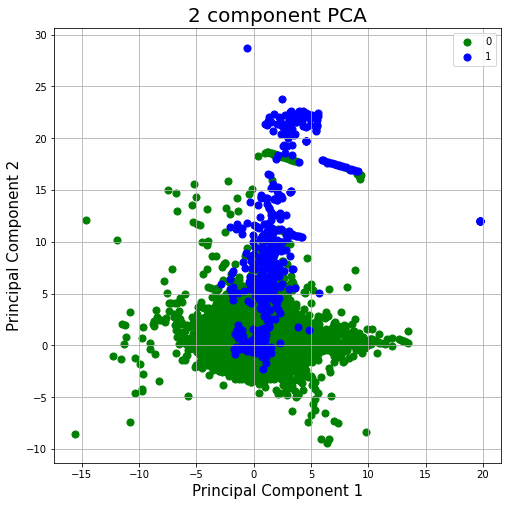

In [8]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
# ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
# ax.set_ylabel('Principal Component 3', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1]
colors = ['g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Class'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC_1']
               , finalDf.loc[indicesToKeep, 'PC_2']
#              , finalDf.loc[indicesToKeep, 'PC_3']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [9]:
good_idx = finalDf['Class'] == 0
bad_idx = finalDf['Class'] == 1

good_data = finalDf.loc[good_idx]
bad_data = finalDf.loc[bad_idx]
print(good_data.shape)
print(bad_data.shape)

good_sampling = np.random.randint(len(good_data), size=200)
final_good = good_data.loc[good_data.index.values[good_sampling]].reset_index(drop=True)

bad_sampling = np.random.randint(len(bad_data), size=200)
final_bad = bad_data.loc[bad_data.index.values[bad_sampling]].reset_index(drop=True)

final = pd.concat([final_good, final_bad], axis=0)

from sklearn.utils import shuffle
final = shuffle(final).reset_index(drop=True)
print(final)

(284315, 3)
(492, 3)
         PC_1       PC_2  Class
0   -1.461000   1.458754      1
1    4.871392  21.245081      1
2    1.582315   4.550486      1
3    0.688153  -0.107004      0
4    2.289420   7.347961      1
..        ...        ...    ...
395  2.538048   8.025648      1
396  2.334645  21.229887      1
397  5.655853   5.067425      1
398  0.746007  -1.073930      1
399 -1.068511   0.102246      1

[400 rows x 3 columns]


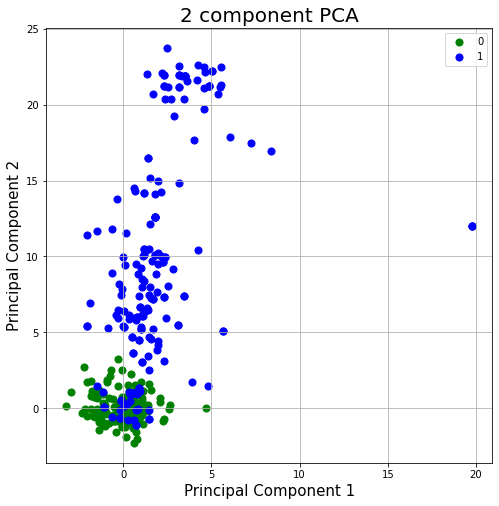

In [10]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
# ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
# ax.set_ylabel('Principal Component 3', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1]
colors = ['g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = final['Class'] == target
    ax.scatter(final.loc[indicesToKeep, 'PC_1']
               , final.loc[indicesToKeep, 'PC_2']
#              , finalDf.loc[indicesToKeep, 'PC_3']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [11]:
X_train = final.values
# X_train = np.hstack((X_train[:,:-1], np.zeros((X_train.shape[0], 1)))) # padding to reach 3 dimensions
X_train = X_train[:,:-1]
label_angles = np.asarray([y if y==1 else -1 for y in final.loc[:,'Class']]).reshape(-1,1)
# X_train = np.hstack((X_train, label_angles))
new_y_train = np.ones(((X_train.shape[0], 1)))
# print(X_train)

y_train = final.loc[:,'Class']


# X_train = np.load("2_layers_train.npy")

# train_features = X_train[:,:-2]
# train_targets = X_train[:,-1].reshape([-1,1])

train_features = np.array(X_train)
train_targets = np.array(y_train).reshape([-1,1])

In [12]:
import random
from sklearn.utils import shuffle

t_good_idx = finalDf['Class'] == 0
t_bad_idx = finalDf['Class'] == 1

new_good_data = finalDf.loc[t_good_idx]
new_bad_data = finalDf.loc[t_bad_idx]

new_good_sampling = random.sample([i for i in range(len(new_good_data)) if i not in good_sampling],330)
new_final_good = new_good_data.loc[new_good_data.index.values[new_good_sampling]].reset_index(drop=True)

new_bad_sampling = [i for i in range(len(new_bad_data)) if i not in bad_sampling]
new_final_bad = new_bad_data.loc[new_bad_data.index.values[new_bad_sampling]].reset_index(drop=True)

new_final = pd.concat([new_final_good, new_final_bad], axis=0)
new_final = shuffle(new_final).reset_index(drop=True)

val_features = np.array(new_final.values[:,:-1])
val_targets = np.array(new_final.values[:,-1].reshape([-1,1]))

# X_test = np.load("2_layers_test.npy")

# val_features = X_test[:,:-2]
# val_targets = X_test[:,-1].reshape([-1,1])

# X_test = np.load("2_layers_test.npy")

# val_features = X_test[:,:-2]
# val_targets = X_test[:,-1].reshape([-1,1])

# val_features -= mean
# val_features /= std

In [13]:
# # Analyze class imbalance

# print(train_targets.shape)
# print(train_targets.astype(np.int64))
counts = np.bincount(train_targets[:, 0].astype(np.int64))
print(
    "Number of positive samples in training data: {} ({:.2f}% of total)".format(
        counts[1], 100 * float(counts[1]) / len(train_targets)
    )
)

weight_for_0 = 1.0 / counts[0]
weight_for_1 = 1.0 / counts[1]

Number of positive samples in training data: 200 (50.00% of total)


In [14]:
# Normalize data

mean = np.mean(train_features, axis=0)
train_features -= mean
val_features -= mean
std = np.std(train_features, axis=0)
train_features /= std
val_features /= std

print(val_features.shape)

(664, 2)


In [15]:
# Build binary classif. model
# ! pip install tensorflow
from tensorflow import keras

model = keras.Sequential(
    [
        keras.layers.Dense(
            3, activation="relu", input_shape=(train_features.shape[-1],)
        ),
#         keras.layers.Dense(256, activation="relu"),
#         keras.layers.Dropout(0.3),
#         keras.layers.Dense(256, activation="relu"),
#         keras.layers.Dropout(0.3),
        keras.layers.Dense(1, activation="sigmoid"),
    ]
)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 3)                 9         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 4         
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [16]:
# Train model with class_weight argument

metrics = [
    keras.metrics.FalseNegatives(name="fn"),
    keras.metrics.FalsePositives(name="fp"),
    keras.metrics.TrueNegatives(name="tn"),
    keras.metrics.TruePositives(name="tp"),
    keras.metrics.Precision(name="precision"),
    keras.metrics.Recall(name="recall"),
]

model.compile(
    optimizer=keras.optimizers.Adam(1e-2), loss="binary_crossentropy", metrics=metrics
)

callbacks = [keras.callbacks.ModelCheckpoint("fraud_model_at_epoch_{epoch}.h5")]
weight_for_0 = 0.5
weight_for_1 = 0.5
class_weight = {0: weight_for_0, 1: weight_for_1}

history = model.fit(
    train_features,
    train_targets,
    batch_size=500,
    epochs=150,
    verbose=2,
    callbacks=callbacks,
    validation_data=(val_features, val_targets),
    class_weight=class_weight,
)

Epoch 1/150
1/1 - 2s - loss: 0.3717 - fn: 141.0000 - fp: 136.0000 - tn: 64.0000 - tp: 59.0000 - precision: 0.3026 - recall: 0.2950 - val_loss: 0.7315 - val_fn: 221.0000 - val_fp: 215.0000 - val_tn: 115.0000 - val_tp: 113.0000 - val_precision: 0.3445 - val_recall: 0.3383
Epoch 2/150
1/1 - 0s - loss: 0.3685 - fn: 142.0000 - fp: 131.0000 - tn: 69.0000 - tp: 58.0000 - precision: 0.3069 - recall: 0.2900 - val_loss: 0.7257 - val_fn: 225.0000 - val_fp: 207.0000 - val_tn: 123.0000 - val_tp: 109.0000 - val_precision: 0.3449 - val_recall: 0.3263
Epoch 3/150
1/1 - 0s - loss: 0.3655 - fn: 145.0000 - fp: 121.0000 - tn: 79.0000 - tp: 55.0000 - precision: 0.3125 - recall: 0.2750 - val_loss: 0.7204 - val_fn: 227.0000 - val_fp: 197.0000 - val_tn: 133.0000 - val_tp: 107.0000 - val_precision: 0.3520 - val_recall: 0.3204
Epoch 4/150
1/1 - 0s - loss: 0.3627 - fn: 146.0000 - fp: 114.0000 - tn: 86.0000 - tp: 54.0000 - precision: 0.3214 - recall: 0.2700 - val_loss: 0.7157 - val_fn: 231.0000 - val_fp: 184.0000

Epoch 32/150
1/1 - 0s - loss: 0.3354 - fn: 146.0000 - fp: 17.0000 - tn: 183.0000 - tp: 54.0000 - precision: 0.7606 - recall: 0.2700 - val_loss: 0.6671 - val_fn: 235.0000 - val_fp: 23.0000 - val_tn: 307.0000 - val_tp: 99.0000 - val_precision: 0.8115 - val_recall: 0.2964
Epoch 33/150
1/1 - 0s - loss: 0.3348 - fn: 142.0000 - fp: 16.0000 - tn: 184.0000 - tp: 58.0000 - precision: 0.7838 - recall: 0.2900 - val_loss: 0.6655 - val_fn: 232.0000 - val_fp: 23.0000 - val_tn: 307.0000 - val_tp: 102.0000 - val_precision: 0.8160 - val_recall: 0.3054
Epoch 34/150
1/1 - 0s - loss: 0.3341 - fn: 142.0000 - fp: 16.0000 - tn: 184.0000 - tp: 58.0000 - precision: 0.7838 - recall: 0.2900 - val_loss: 0.6639 - val_fn: 230.0000 - val_fp: 23.0000 - val_tn: 307.0000 - val_tp: 104.0000 - val_precision: 0.8189 - val_recall: 0.3114
Epoch 35/150
1/1 - 0s - loss: 0.3333 - fn: 141.0000 - fp: 16.0000 - tn: 184.0000 - tp: 59.0000 - precision: 0.7867 - recall: 0.2950 - val_loss: 0.6621 - val_fn: 227.0000 - val_fp: 23.0000 

Epoch 63/150
1/1 - 0s - loss: 0.2729 - fn: 76.0000 - fp: 13.0000 - tn: 187.0000 - tp: 124.0000 - precision: 0.9051 - recall: 0.6200 - val_loss: 0.5381 - val_fn: 132.0000 - val_fp: 15.0000 - val_tn: 315.0000 - val_tp: 202.0000 - val_precision: 0.9309 - val_recall: 0.6048
Epoch 64/150
1/1 - 0s - loss: 0.2697 - fn: 76.0000 - fp: 13.0000 - tn: 187.0000 - tp: 124.0000 - precision: 0.9051 - recall: 0.6200 - val_loss: 0.5320 - val_fn: 131.0000 - val_fp: 14.0000 - val_tn: 316.0000 - val_tp: 203.0000 - val_precision: 0.9355 - val_recall: 0.6078
Epoch 65/150
1/1 - 0s - loss: 0.2666 - fn: 74.0000 - fp: 13.0000 - tn: 187.0000 - tp: 126.0000 - precision: 0.9065 - recall: 0.6300 - val_loss: 0.5259 - val_fn: 128.0000 - val_fp: 14.0000 - val_tn: 316.0000 - val_tp: 206.0000 - val_precision: 0.9364 - val_recall: 0.6168
Epoch 66/150
1/1 - 0s - loss: 0.2634 - fn: 71.0000 - fp: 13.0000 - tn: 187.0000 - tp: 129.0000 - precision: 0.9085 - recall: 0.6450 - val_loss: 0.5198 - val_fn: 128.0000 - val_fp: 14.0000

Epoch 94/150
1/1 - 0s - loss: 0.1975 - fn: 54.0000 - fp: 13.0000 - tn: 187.0000 - tp: 146.0000 - precision: 0.9182 - recall: 0.7300 - val_loss: 0.3879 - val_fn: 86.0000 - val_fp: 13.0000 - val_tn: 317.0000 - val_tp: 248.0000 - val_precision: 0.9502 - val_recall: 0.7425
Epoch 95/150
1/1 - 0s - loss: 0.1960 - fn: 54.0000 - fp: 13.0000 - tn: 187.0000 - tp: 146.0000 - precision: 0.9182 - recall: 0.7300 - val_loss: 0.3847 - val_fn: 84.0000 - val_fp: 13.0000 - val_tn: 317.0000 - val_tp: 250.0000 - val_precision: 0.9506 - val_recall: 0.7485
Epoch 96/150
1/1 - 0s - loss: 0.1944 - fn: 52.0000 - fp: 13.0000 - tn: 187.0000 - tp: 148.0000 - precision: 0.9193 - recall: 0.7400 - val_loss: 0.3816 - val_fn: 83.0000 - val_fp: 12.0000 - val_tn: 318.0000 - val_tp: 251.0000 - val_precision: 0.9544 - val_recall: 0.7515
Epoch 97/150
1/1 - 0s - loss: 0.1929 - fn: 51.0000 - fp: 12.0000 - tn: 188.0000 - tp: 149.0000 - precision: 0.9255 - recall: 0.7450 - val_loss: 0.3786 - val_fn: 82.0000 - val_fp: 12.0000 - v

Epoch 125/150
1/1 - 0s - loss: 0.1608 - fn: 38.0000 - fp: 9.0000 - tn: 191.0000 - tp: 162.0000 - precision: 0.9474 - recall: 0.8100 - val_loss: 0.3167 - val_fn: 68.0000 - val_fp: 8.0000 - val_tn: 322.0000 - val_tp: 266.0000 - val_precision: 0.9708 - val_recall: 0.7964
Epoch 126/150
1/1 - 0s - loss: 0.1599 - fn: 38.0000 - fp: 9.0000 - tn: 191.0000 - tp: 162.0000 - precision: 0.9474 - recall: 0.8100 - val_loss: 0.3152 - val_fn: 68.0000 - val_fp: 8.0000 - val_tn: 322.0000 - val_tp: 266.0000 - val_precision: 0.9708 - val_recall: 0.7964
Epoch 127/150
1/1 - 0s - loss: 0.1591 - fn: 38.0000 - fp: 9.0000 - tn: 191.0000 - tp: 162.0000 - precision: 0.9474 - recall: 0.8100 - val_loss: 0.3137 - val_fn: 68.0000 - val_fp: 8.0000 - val_tn: 322.0000 - val_tp: 266.0000 - val_precision: 0.9708 - val_recall: 0.7964
Epoch 128/150
1/1 - 0s - loss: 0.1583 - fn: 38.0000 - fp: 9.0000 - tn: 191.0000 - tp: 162.0000 - precision: 0.9474 - recall: 0.8100 - val_loss: 0.3122 - val_fn: 68.0000 - val_fp: 8.0000 - val_t

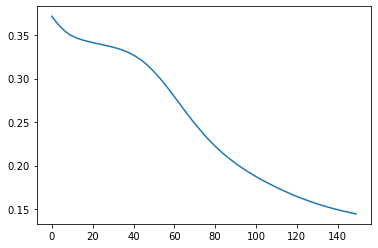

In [17]:
plt.plot(history.history['loss'])

In [18]:
predictions = model.predict(train_features)

thres_pred = []
threshold = 0.7
counts = 0 
tp=0
fn = 0
fp = 0
for (i,p) in enumerate(predictions):
    label = 0
    if p > threshold:
        label = 1
    else: 
        label = 0
    if label == train_targets[i]:
        counts +=1
        if label ==1: 
            tp +=1
    else:
        if label == 1:
            fn +=1
        else:
            fp +=1
    thres_pred.append(label)
print(counts/len(predictions))
print("tp: ", tp, "tn: ", counts-tp," fp: ", fp, " fn: ", fn)

0.8875
tp:  157 tn:  198  fp:  43  fn:  2


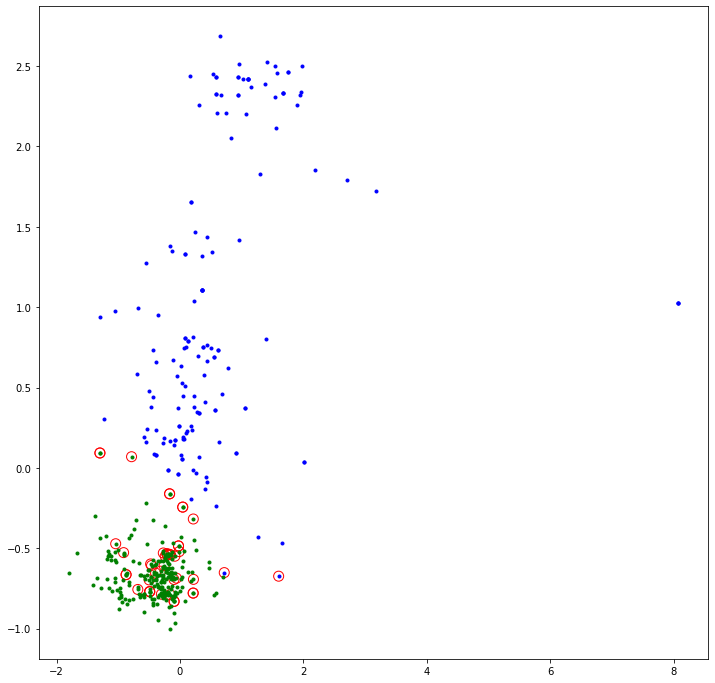

In [19]:
fig = plt.figure(figsize=(12,12))
# ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for x, y_target, y_ in zip(train_features, train_targets, thres_pred):
    if y_ == 1:
        plt.plot(x[0], x[1], 'bo', markersize=3)
    else:
        plt.plot(x[0], x[1], 'go', markersize=3)
    if y_target != y_:
        plt.scatter(x[0], x[1], s=100, facecolors='none', edgecolors='r', linewidths=1)
plt.show()

In [20]:
# X_test = np.load("2_layers_test.npy")

val_features = X_test[:,:-2]
val_targets = (X_test[:,-1].reshape([-1,1]) + 1)/2

val_features -= mean
val_features /= std

In [21]:
predictions = model.predict(val_features)

thres_pred = []
threshold = 0.7
counts = 0 
tp=0
fn = 0
fp = 0
for (i,p) in enumerate(predictions):
    label = 0
    if p > threshold:
        label = 1
    else: 
        label = 0
    if label == val_targets[i]:
        counts +=1
        if label ==1: 
            tp +=1
    else:
        if label == 1:
            fn +=1
        else:
            fp +=1
    thres_pred.append(label)
print(counts/len(predictions))
print("tp: ", tp, "tn: ", counts-tp," fp: ", fp, " fn: ", fn)

0.8765060240963856
tp:  255 tn:  327  fp:  79  fn:  3


In [22]:
val_features *= std
val_features += mean

# print(X_test[:,-1].shape, X_test[:,:-2].shape)
# print(val_features.shape, val_targets.shape, len(thres_pred))

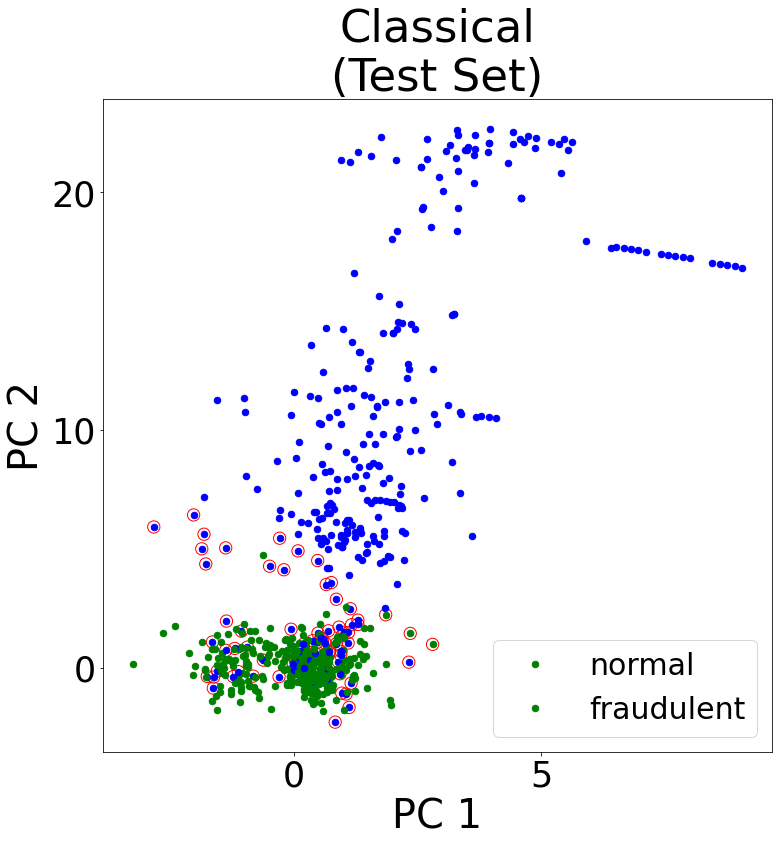

In [36]:
plt.figure(figsize=(12,12))

plt.xlabel('PC 1', fontsize = 40)
plt.ylabel('PC 2', fontsize = 40)
plt.title('Classical\n(Test Set)', fontsize = 45)
plt.xticks(fontsize=35)
plt.yticks(fontsize=35)
            
# print(thres_pred)
for x, y_target, y_ in zip(val_features, val_targets, thres_pred):
    if x[0]<15 and x[1] < 25:
        if y_target== 0:
            plt.plot(x[0], x[1], 'go', markersize=6.5)
        elif y_target == 1:
            plt.plot(x[0], x[1], 'bo', markersize=6.5)
            pass
    # plt.show()
    
for x, y_target, y_ in zip(val_features, val_targets, thres_pred):
    if x[0]<15 and x[1] < 25:
        if y_target != y_:
            plt.scatter(x[0], x[1], s=150, facecolors='none', edgecolors='r', linewidths=1)
            
plt.legend(["normal", "fraudulent"], prop={'size': 30})

plt.locator_params(axis='x', nbins=4, min_n_ticks=2)
plt.locator_params(axis='y', nbins=5, min_n_ticks=2)

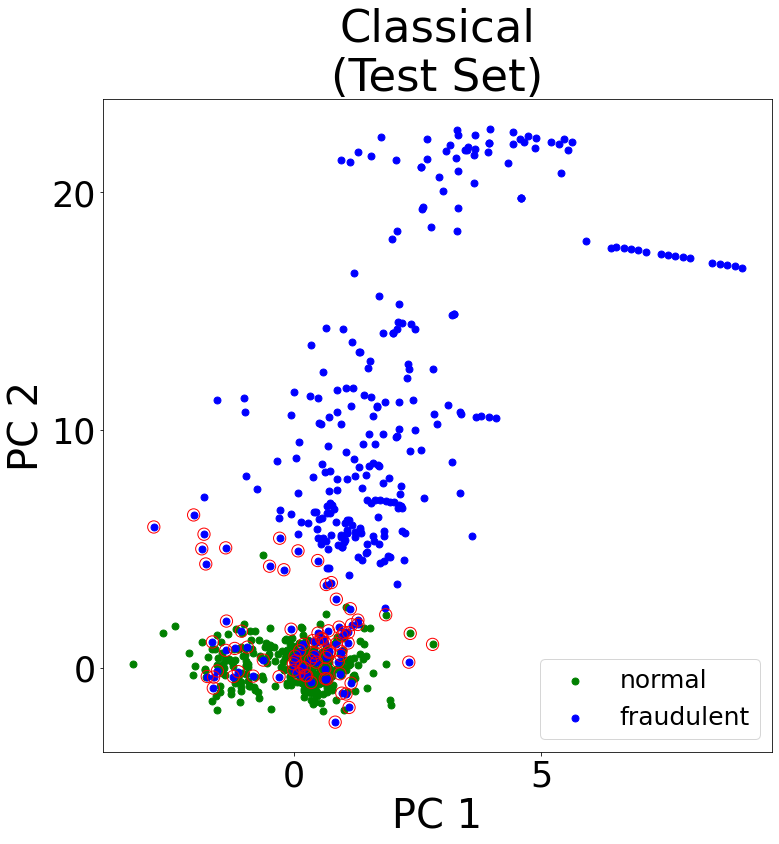

In [48]:
fig = plt.figure(figsize = (12,12))

plt.xlabel('PC 1', fontsize = 40)
plt.ylabel('PC 2', fontsize = 40)
plt.title('Classical\n(Test Set)', fontsize = 45)
plt.xticks(fontsize=35)
plt.yticks(fontsize=35)

targets = [0, 1]
colors = ['g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = val_targets == target
#     print(indicesToKeep.shape[:,0])
    filter1 = np.abs(val_features[:, 0]) < 15
    filter2 = np.abs(val_features[:, 1]) < 25
    
    final_indices = np.logical_and(filter1, indicesToKeep[:,0])
    final_indices = np.logical_and(filter2, final_indices)
    plt.scatter(val_features[final_indices, 0], val_features[final_indices, 1],
    c = color, s = 48)

    
for x, y_target, y_ in zip(val_features, val_targets, thres_pred):
    if x[0]<15 and x[1] < 25:
        if y_target != y_:
            plt.scatter(x[0], x[1], s=150, facecolors='none', edgecolors='r', linewidths=1)
            
plt.legend(['normal', 'fraudulent'], prop={'size': 25}, loc="lower right")

# To specify the number of ticks on both or any single axes
plt.locator_params(axis='y', nbins=5, min_n_ticks=2)
plt.locator_params(axis='x', nbins=4, min_n_ticks=2)

In [ ]:
import numpy as np
import torch

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit.providers.aer import QasmSimulator

In [47]:
np.save("2_layers_test.npy", X_test)
np.save("2_layers_train.npy", X_train)